In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Height distributions are well established as normal for a given gender.

In [2]:
#https://dqydj.com/height-percentile-calculator-for-men-and-women/
height_norm_param = dict(M=dict(loc=1.757, scale=0.078),F=dict(loc=1.615,scale=0.071))

In [3]:
n_obs = 10000
np.random.seed(12345)

In [4]:
gender = np.random.choice(list(height_norm_param.keys()),n_obs)
#print(gender)
height = [np.random.normal(**height_norm_param.get(gen)) for gen in gender]
print(height[:5])

[1.8412156651782023, 1.7316060956411254, 1.6076393104051503, 1.5523106002002909, 1.741606131256142]


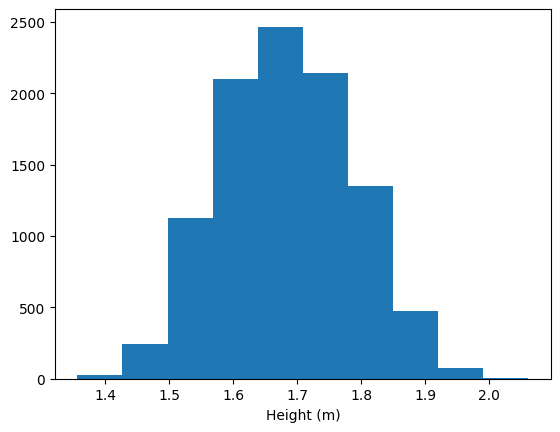

In [5]:
plt.hist(height)
plt.xlabel("Height (m)")
plt.show()


I'll work under the assumption that weights for a given height are a random gamma distribution.

Links for the gamma GLM distribution include log and inverse (I'll go for the log).  Specifically,
 
 $$log(b_0 + b_1 * height_i) = \mu_i = \alpha * \beta$$
 
I'll make the additional assumtion that variance should also increase as height increases

   $$ var(mass_i | height_i) = \alpha * \beta^2 \propto \mu_i $$

e.g. for a height of 1.8, the bounds of "normal" BMI is 62 to 81 kg



In [6]:
floor_weight = 40
b0 = 10**22
b1 = 10**2
mass = [np.random.gamma(shape = (np.log(b0 + b1 * height))**(1/2),scale = (np.log(b0 + b1 * height))**(1/2)) + floor_weight for height in height]

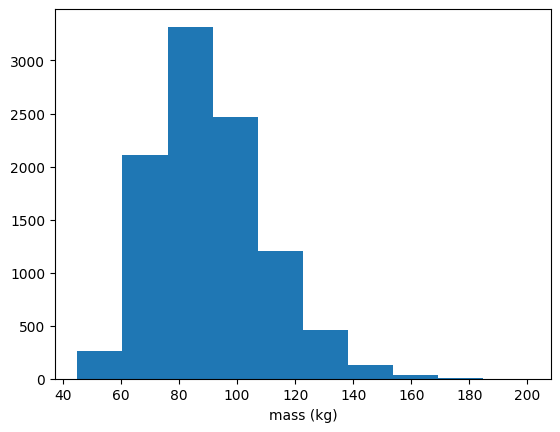

In [7]:
plt.hist(mass)
plt.xlabel("mass (kg)")
plt.show()


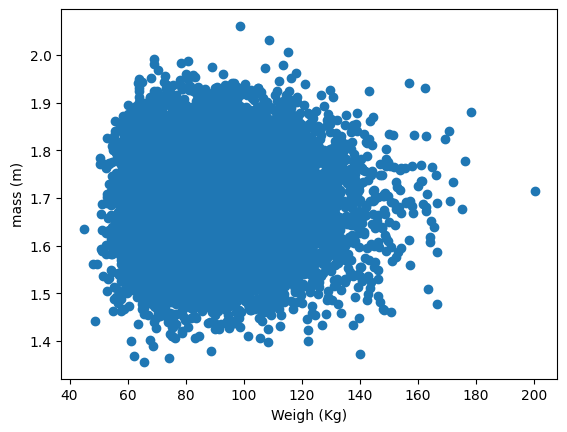

In [8]:
plt.scatter(mass,height)
plt.xlabel("Weigh (Kg)")
plt.ylabel("mass (m)")
plt.show()

How accurate is the above?  
I'm only so concened.  

It's much improved over Kaggle's BMI data set.
(see below)

In [9]:
#save the data set
datadict = {"gender":gender, "height":height,"mass":mass}
BMI_df = pd.DataFrame(data = datadict)

BMI_df.to_csv("simulatedBMIdata.csv")

In [10]:
!kaggle datasets download -d yersever/500-person-gender-height-weight-bodymassindex

  0%|                                               | 0.00/2.26k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 2.26k/2.26k [00:00<00:00, 4.77MB/s]


In [11]:
!unzip 500-person-gender-height-weight-bodymassindex.zip 

Archive:  500-person-gender-height-weight-bodymassindex.zip
  inflating: 500_Person_Gender_Height_Weight_Index.csv  


In [12]:
BMI_X = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")

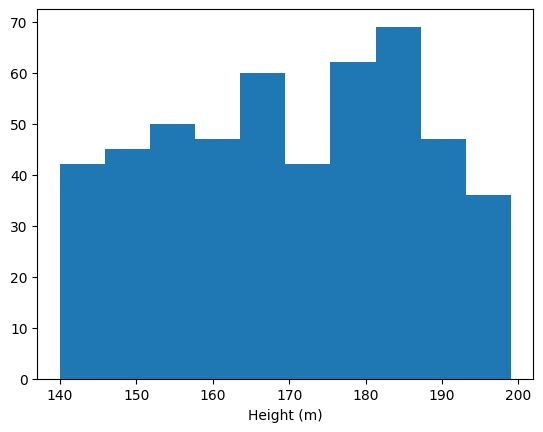

In [13]:
plt.hist(BMI_X["Height"])
plt.xlabel("Height (m)")
plt.show()

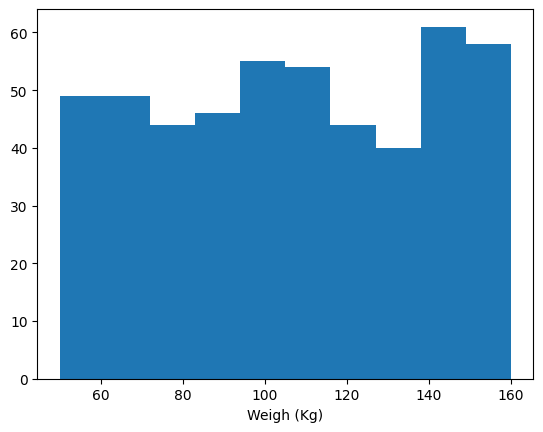

In [14]:
plt.hist(BMI_X["Weight"])
plt.xlabel("Weigh (Kg)")
plt.show()

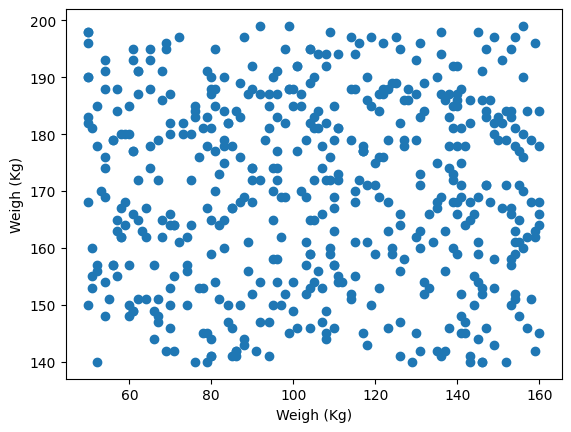

In [15]:
plt.scatter(BMI_X["Weight"],BMI_X["Height"])
plt.xlabel("Weigh (Kg)")
plt.ylabel("Weigh (Kg)")
plt.show()

In [16]:
!rm 500-person-gender-height-weight-bodymassindex.zip 500_Person_Gender_Height_Weight_Index.csv